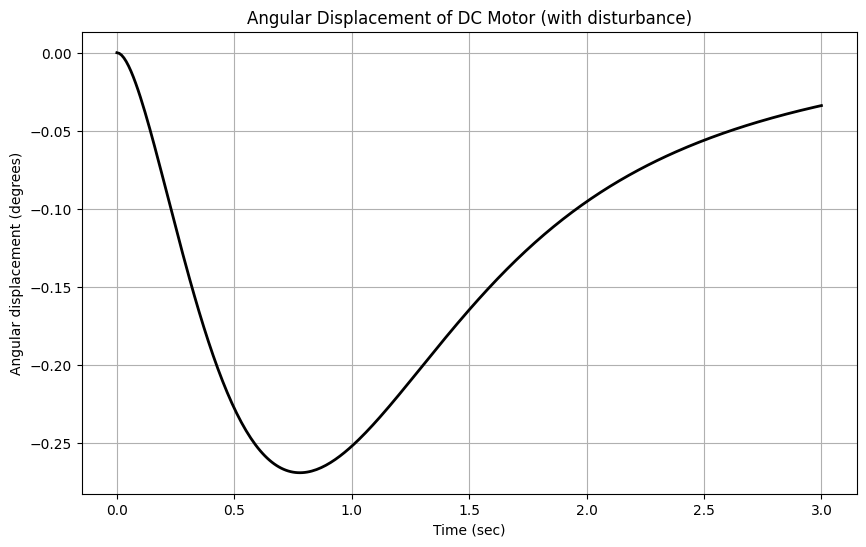

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def DC_motor_w(x, t):
    # Parameters and matrices from the MATLAB function DC_motor_w
    A = np.array([[0, 1, 0, 0],
                  [0, 0, 4.438, -7.396],
                  [0, -12, -24, 0],
                  [0, 0, 0, -1]])

    B = np.array([[0, 0],
                  [0, -7.396],
                  [20, 0],
                  [0, 0]])

    k = np.array([3.0000, 0.8796, 0.1529, -1.8190])
    theta_d = 0           # Desired angular position
    Tl = 0.01             # Step disturbance

    v1 = 2.255 * Tl - k[0] * (x[0] - theta_d) - k[1] * x[1] - k[2] * x[2]
    v2 = 2.255 * Tl - np.dot(k, x)
    u = np.array([v1, Tl])

    xp = np.dot(A, x) + np.dot(B, u)
    return xp

# Initial conditions and time span
x0 = np.array([0.0, 0.0, 0.0, 0.01])
t = np.linspace(0, 3, 301)  # Time points for integration

# Solve the ODE system
x = odeint(DC_motor_w, x0, t)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, x[:, 0] * 180 / np.pi, 'k', linewidth=2)
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Angular displacement (degrees)')
plt.title('Angular Displacement of DC Motor (with disturbance)')
plt.show()
